In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import sidetable

In [2]:
df = pd.read_csv('Car_sales.csv')
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

### Analyze columns which are having null or empty

In [5]:
mean = df['__year_resale_value'].mean()
median = df['__year_resale_value'].median()
mode = df['__year_resale_value'].mode()[0]
print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

Mean: 18.072975206611574, Median: 14.18, Mode: 7.75


> ### Mean, Median and Mode are not similar

### Checking the distribution

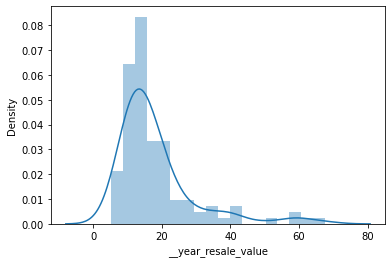

In [7]:
sns.distplot(df['__year_resale_value'])
plt.show()

In [8]:
df['__year_resale_value'].isna().sum()

36

> ##### There are 36 null values

#### Checking for outliers

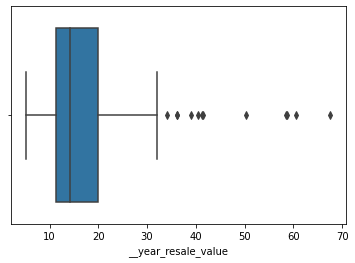

In [10]:
sns.boxplot(df['__year_resale_value'])
plt.show()

In [12]:
df.stb.missing()

,missing,total,percent
__year_resale_value,36,157,22.929936
Fuel_efficiency,3,157,1.910828
Price_in_thousands,2,157,1.273885
Curb_weight,2,157,1.273885
Power_perf_factor,2,157,1.273885
Engine_size,1,157,0.636943
Horsepower,1,157,0.636943
Wheelbase,1,157,0.636943
Width,1,157,0.636943
Length,1,157,0.636943


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


#### Getting all categorical variables

<Figure size 432x288 with 0 Axes>

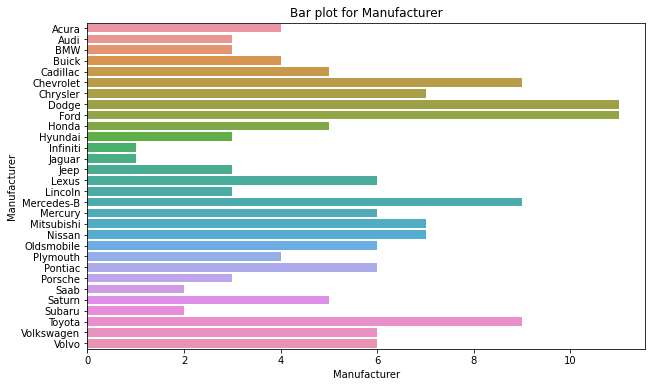

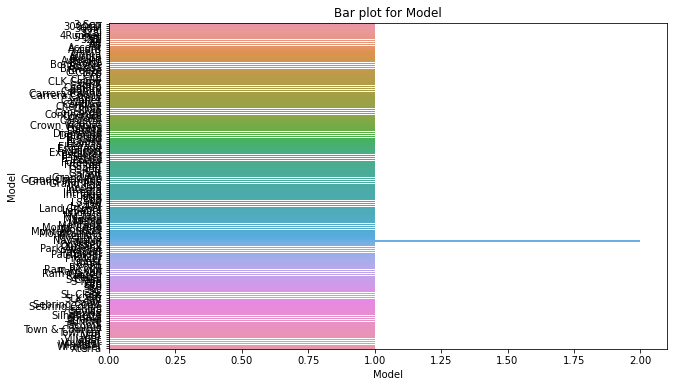

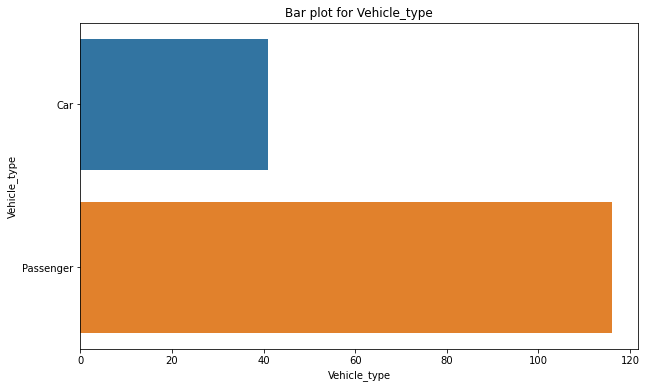

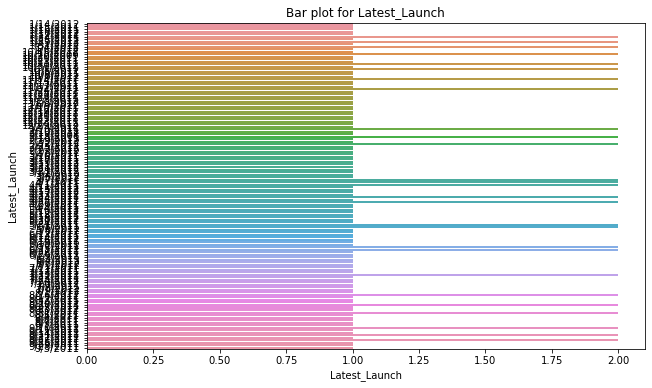

In [36]:
plt.tight_layout()
for col in df.select_dtypes(include='object').columns:
    result = df.groupby(col)[col].count()
    plt.figure(figsize=(10,6))
    sns.barplot(x=result,y=result.index)
    plt.title(f"Bar plot for {col}")
    plt.show()

<Figure size 432x288 with 0 Axes>

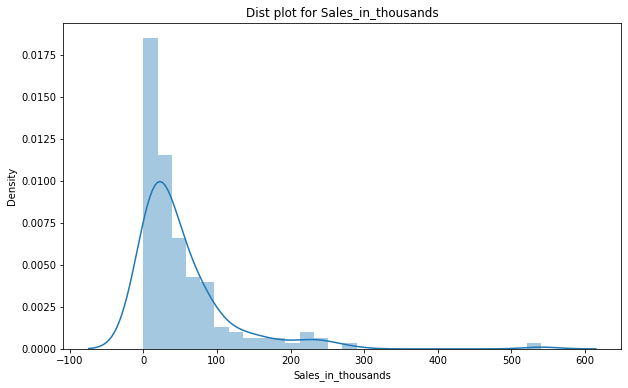

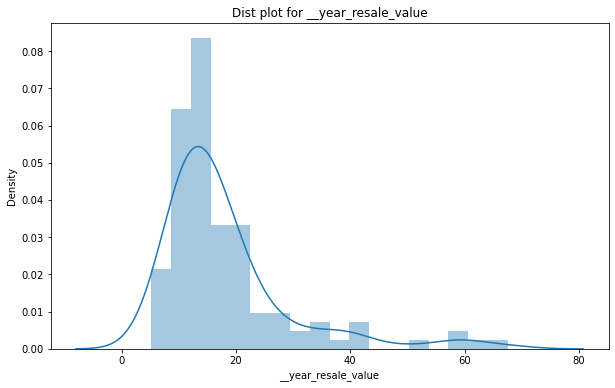

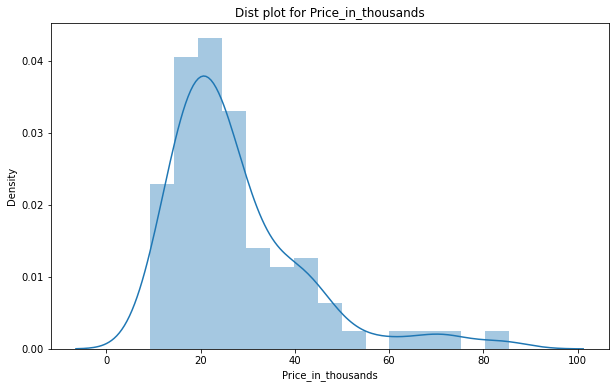

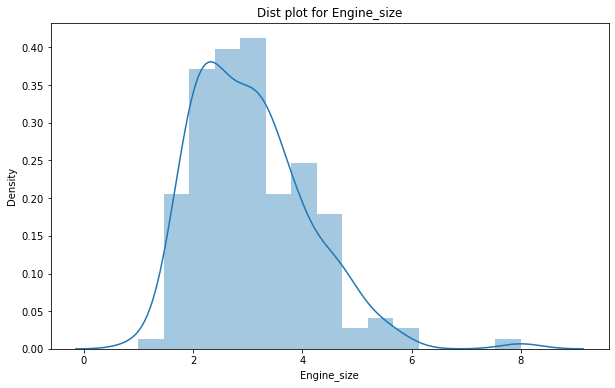

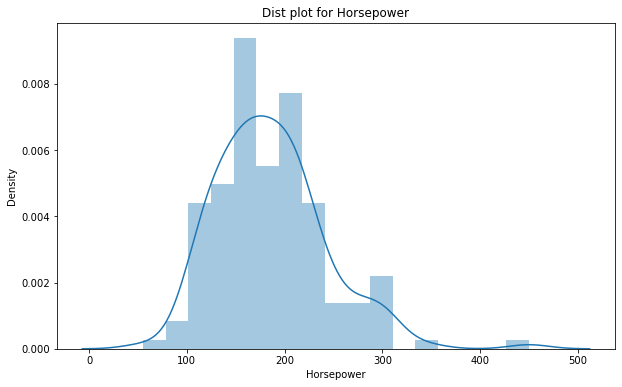

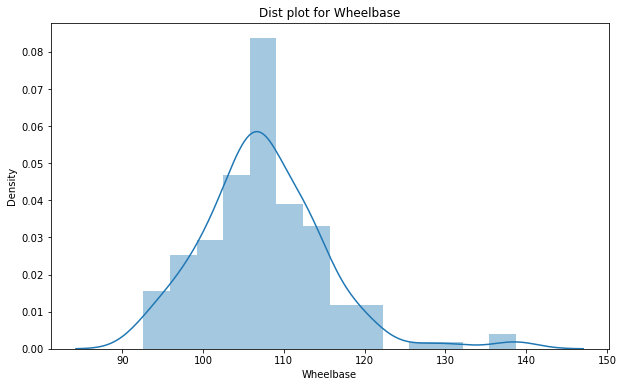

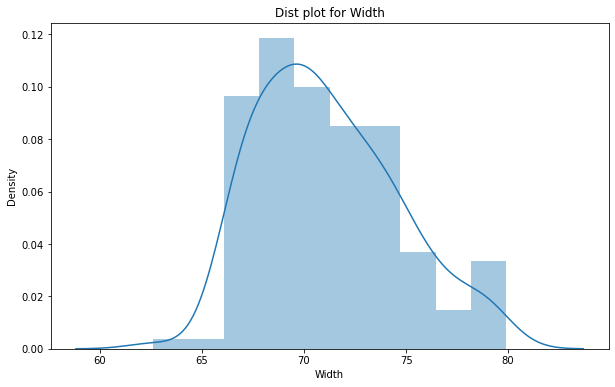

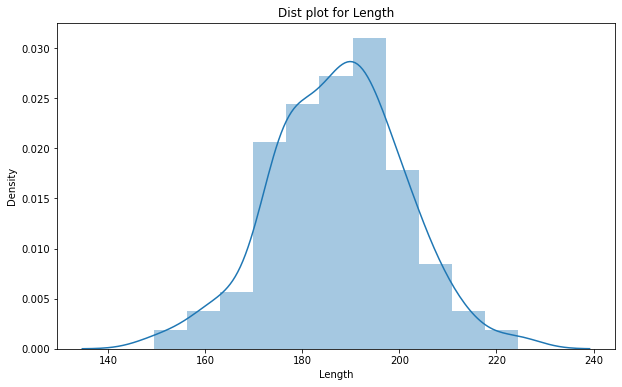

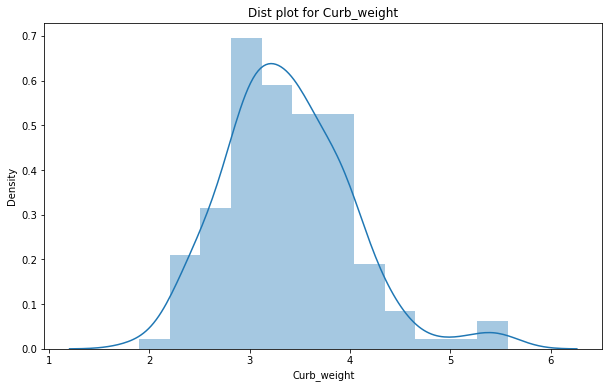

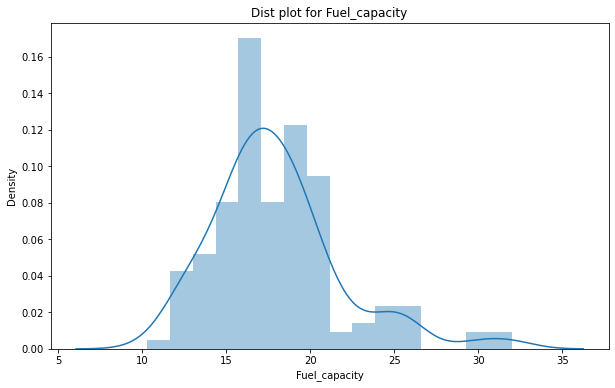

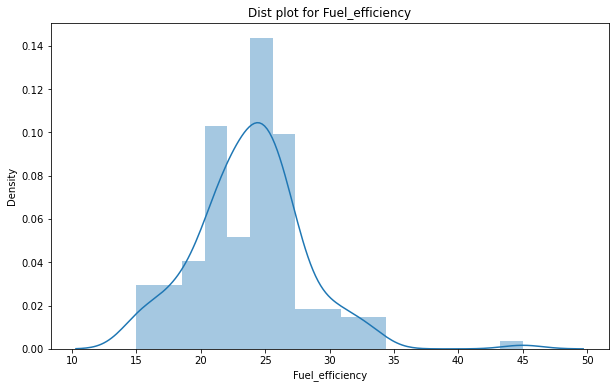

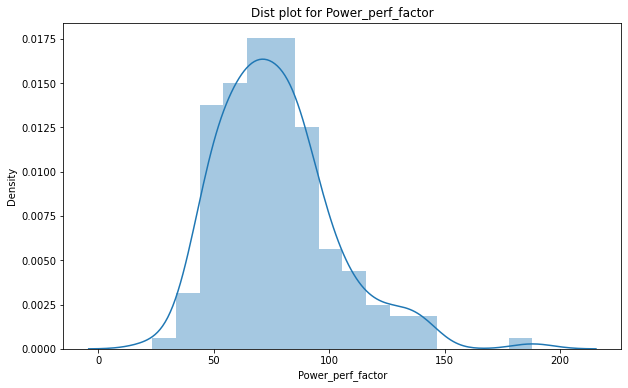

In [37]:
plt.tight_layout()
for col in df.select_dtypes(exclude='object').columns:
    result = df.groupby(col)[col].count()
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.title(f"Dist plot for {col}")
    plt.show()

<Figure size 720x720 with 0 Axes>

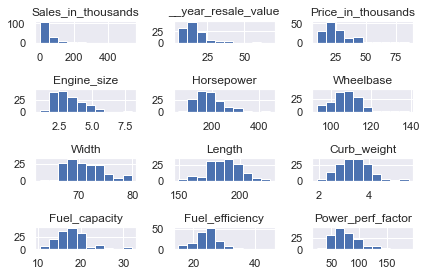

In [41]:
plt.figure(figsize=(10,10))
sns.set()
df.hist()
plt.tight_layout()
plt.show()

In [46]:
df.stb.freq(cols=['Manufacturer'])

,Manufacturer,count,percent,cumulative_count,cumulative_percent
0,Ford,11,7.006369,11,7.006369
1,Dodge,11,7.006369,22,14.012739
2,Toyota,9,5.732484,31,19.745223
3,Mercedes-B,9,5.732484,40,25.477707
4,Chevrolet,9,5.732484,49,31.210191
5,Nissan,7,4.458599,56,35.668790
6,Mitsubishi,7,4.458599,63,40.127389
7,Chrysler,7,4.458599,70,44.585987
8,Volvo,6,3.821656,76,48.407643
9,Volkswagen,6,3.821656,82,52.229299


### Analysis of numerical columns

In [51]:
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
numerical_columns

['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

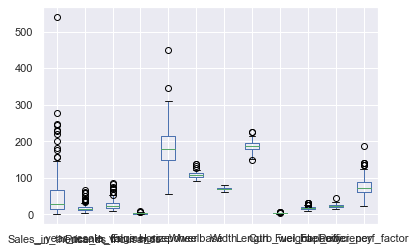

In [56]:
df[numerical_columns].plot(kind='box')
plt.show()

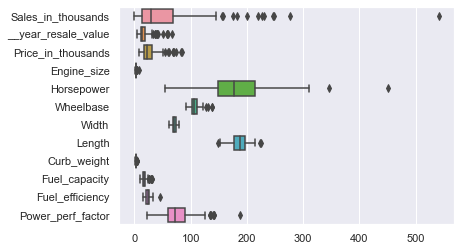

In [62]:
sns.boxplot(data=df[numerical_columns],orient='h')
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
result = mms.fit_transform(df[numerical_columns])

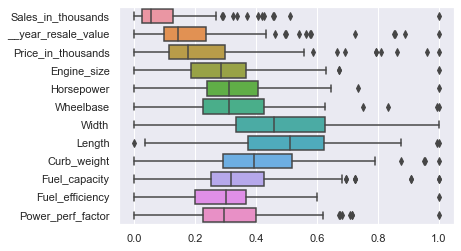

In [72]:
sns.boxplot(data=pd.DataFrame(result, columns=numerical_columns), orient='h')
plt.show()

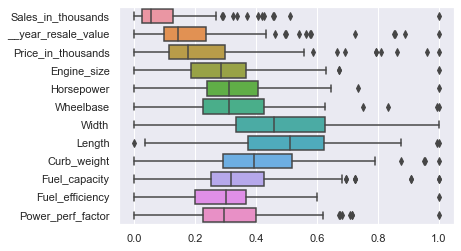

In [76]:
sc = StandardScaler()
result = mms.fit_transform(df[numerical_columns])
sns.boxplot(data=pd.DataFrame(result, columns=numerical_columns), orient='h')
plt.show()

In [73]:
mms.fit(df[numerical_columns])

MinMaxScaler()